# Linear Regression in Python; Predict the Discount for Lack of Marketability (DLOM) for a Closely-Held Business

## Motivation

In order to predict the DLOM (Discount for Lack of Marketability), I chose the dlom dataset that was extrapolated from A Companion Guide to the FMV Restricted Stock Study 2015 Edition. This dataset was based on 736 transactions between January 1980 and December 2015. It has many characteristics of learning.

## Data Preprocessing

In [1]:
import pandas as pd
df = pd.read_csv('dlom_final_data.csv')
df.head()

,TransactionNumber,Volatility,TotalAssets,Revenue,NetProfitMargin,EquityValuation,EquityValuationToBookRatio,DLOM
0,66,0.033299,946.296676,365.035112,0.148706,972.257305,0.101488,0.049245
1,318,0.711990,45.584806,24.540845,-0.107280,110.332886,4.356098,0.151881
2,707,1.446168,1.250298,3.615635,-0.494742,45.300488,21.657697,0.528293
3,729,1.051678,11.104429,3.270666,-0.455199,43.378871,34.592444,0.392889
4,170,0.661816,99.470267,32.480134,-0.061109,188.120081,3.310113,0.095289


There is a feature that we do not need, “TransactionNumber”, so, we will drop it.

In [2]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Volatility                  736 non-null    float64
 1   TotalAssets                 736 non-null    float64
 2   Revenue                     736 non-null    float64
 3   NetProfitMargin             736 non-null    float64
 4   EquityValuation             736 non-null    float64
 5   EquityValuationToBookRatio  736 non-null    float64
 6   DLOM                        736 non-null    float64
dtypes: float64(7)
memory usage: 40.4 KB


I now use the describe() method to show the summary statistics of the numeric variables.

In [3]:
df.describe()

,Volatility,TotalAssets,Revenue,NetProfitMargin,EquityValuation,EquityValuationToBookRatio,DLOM
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,0.802249,143.849974,118.901255,-0.195423,207.113727,7.418786,0.228205
std,0.396635,239.011791,231.132169,0.271895,226.652467,8.956207,0.194888
min,0.012029,0.072242,0.061897,-0.988014,1.455211,0.003068,0.002854
25%,0.660409,21.152144,14.619285,-0.277113,87.897719,3.089858,0.093729
50%,0.734262,46.431285,25.699601,-0.117289,134.385013,4.066432,0.166515
75%,0.883805,92.371271,35.736749,-0.062084,181.219987,5.636706,0.287554
max,1.996477,991.128069,995.984615,0.248909,992.871030,39.295719,0.899887


The count, mean, min and max rows are self-explanatory. The std shows the standard deviation, and the 25%, 50% and 75% rows show the corresponding percentiles.

To get a feel for the type of data we are dealing with, we plot a histogram for each numeric variable.

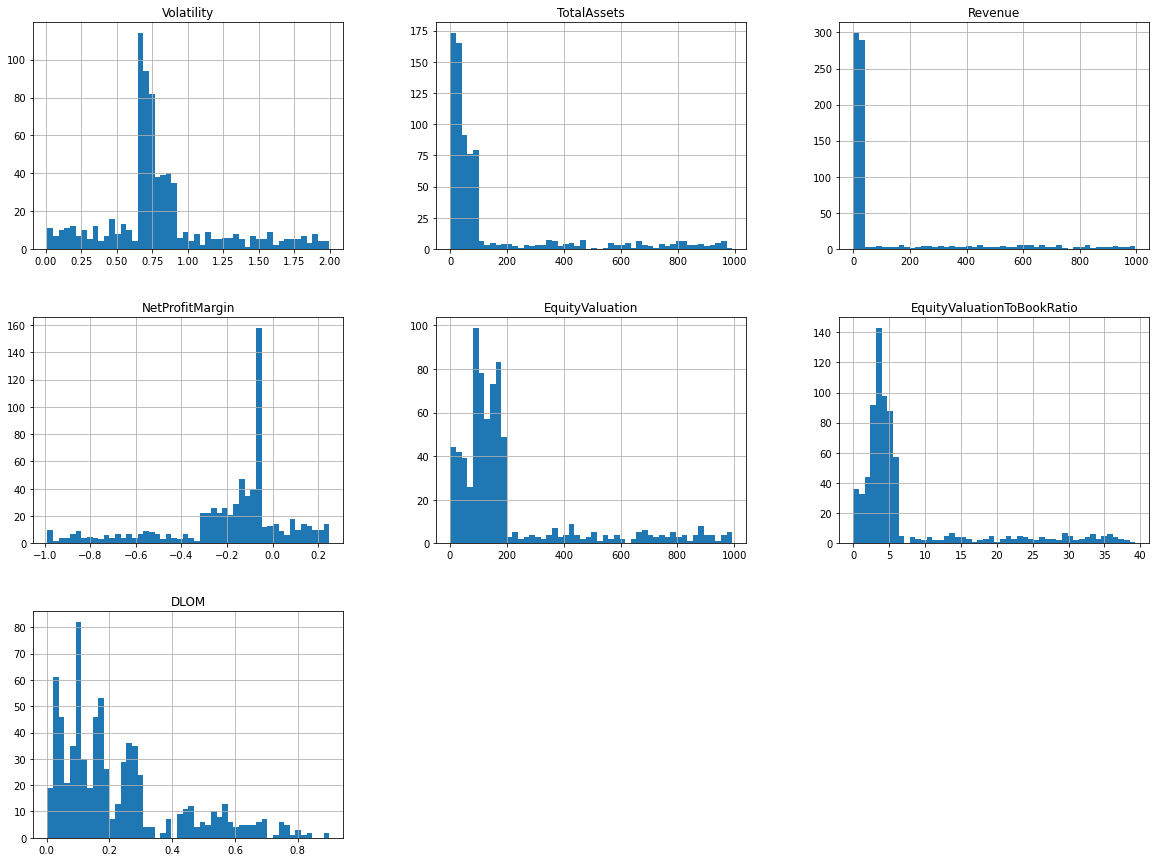

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Some of the histograms are a little bit right skewed, but this is not abnormal.

The variable we are going to predict is the “DLOM”. So let’s look at how much each independent variable correlates with this dependent variable.

In [5]:
corr_matrix = df.corr()
corr_matrix["DLOM"].sort_values(ascending=False)

DLOM                          1.000000
Volatility                    0.848739
EquityValuationToBookRatio    0.815350
Revenue                      -0.449192
TotalAssets                  -0.496809
EquityValuation              -0.578845
NetProfitMargin              -0.889959
Name: DLOM, dtype: float64

The DLOM tends to increase when the Volatility and the equity valuation to Book ratio go up, and when the net profit margin and equity valuation go down. 

We are now going to visualize the correlation between variables by using Pandas’ scatter_matrix function. We will just focus on a few promising variables, that seem the most correlated with the DLOM.

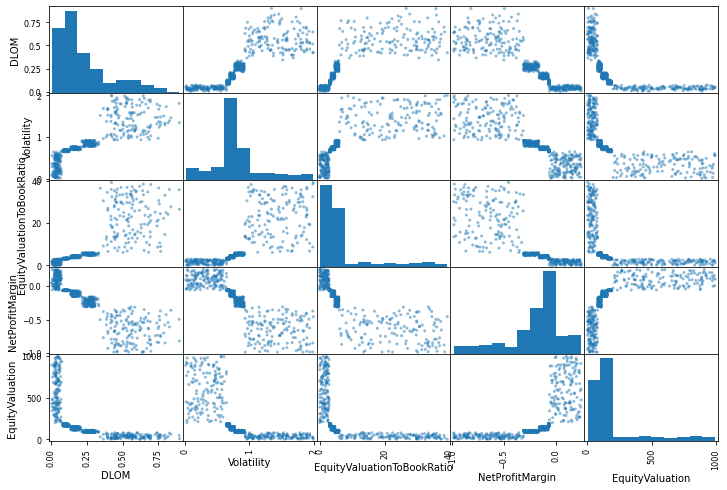

In [6]:
from pandas.plotting import scatter_matrix
attributes = ["DLOM", "Volatility", "EquityValuationToBookRatio", "NetProfitMargin", "EquityValuation"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

The most promising variable for predicting the DLOM is the volatility, so let’s zoom in on their correlation scatter plot.

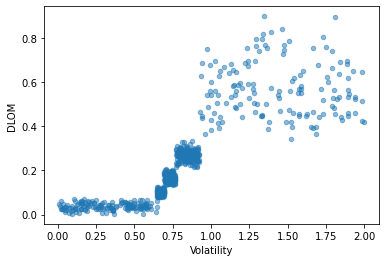

In [7]:
df.plot(kind="scatter", x="Volatility", y="DLOM", alpha=0.5)
plt.savefig('scatter.png')

The correlation is indeed very strong; you can clearly see the upward trend and that the points are not too dispersed.

Before we build the model, we need to perform some statistical learning procedure:

In [8]:
X = df[['Volatility', 'EquityValuation', 'EquityValuationToBookRatio', 'Revenue', 
        'TotalAssets', 'NetProfitMargin']]

Y = df['DLOM']

X.head()

,Volatility,EquityValuation,EquityValuationToBookRatio,Revenue,TotalAssets,NetProfitMargin
0,0.033299,972.257305,0.101488,365.035112,946.296676,0.148706
1,0.711990,110.332886,4.356098,24.540845,45.584806,-0.107280
2,1.446168,45.300488,21.657697,3.615635,1.250298,-0.494742
3,1.051678,43.378871,34.592444,3.270666,11.104429,-0.455199
4,0.661816,188.120081,3.310113,32.480134,99.470267,-0.061109


This is what our data looks like after perform the statistical learning procedure.

## Train and Build a Linear Regression Model

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Done! We now have a working Linear Regression model.

Calculate R squared:

In [10]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.8531


So, in our model, 85.31% of the variability in Y can be explained using X. This is exciting.

Calculate root-mean-square error (RMSE)

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 0.0721


Our model was able to predict the proper DLOM of every transaction in the test set within 7.21% of the real price.

Calculate mean absolute error (MAE):

In [12]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression MAE: 0.0480


## Random Forest

Let’s try a more complex model to see whether results can be improved — the RandomForestRegressor:

In [13]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.9090


In [15]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 0.0567


Much better! Let’s try one more.

## Gradient Boosting

In [16]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor(random_state=101)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=101)

In [17]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.9159


In [18]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 0.0545


These are the best results we have so far, so, I would consider this is our final model.

### Feature Importance

We have used 6 features (variables) in our model. Let’s find out which features are important and vice versa.

In [19]:
feature_labels = np.array(['Volatility','EquityValuation',
                           'EquityValuationToBookRatio',
                           'Revenue', 'TotalAssets', 
                           'NetProfitMargin'])

importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

EquityValuationToBookRatio-42.27%
TotalAssets-21.12%
Volatility-14.06%
EquityValuation-7.69%
Revenue-7.43%
NetProfitMargin-7.42%


The most important features are equity valuation to book ratio, total assets, volatility, equity valuation, and so on. And the least important feature is net profit margin, which means that regardless of whether the private company has a high net profit margin or a low net profit margin, does not matter to the DLOM. Overall, all of these 6 features are used.

## Predicting DLOM for a New Privately-Held Company

So, our Gradient Boosting model is a pretty good model for predicting DLOM. Now how do we predict DLOM for new privately-held companies?

Suppose there is a new privately-held company, which has: a volatility of 0.6618 (i.e., 66.18%), a equity valuation (DCF-based) of 188.12 million USD, equity valuation to book ratio of 3.31 (this is actually the Price/Book multiple or MV/BV multiple), annual revenue of 32.48 million USD, total assets of 99.47 million USD, and a net annual profit margin of minus 0.0611 (i.e., -6.11%). We can take these new data and use it to predict the DLOM.

In [20]:
new_data = np.array([0.6618,188.12,3.31,32.48,99.47,-0.0611]).reshape(1, -1)

new_pred=model.predict(new_data)

print('The DLOM for the new company is: %.4f' % new_pred)

The DLOM for the new company is: 0.1018


So this is how we can build a machine learning model for DLOM and be able to predict the right DLOM for new privately-held companies.